<a href="https://colab.research.google.com/github/swarnava-96/Financial-Analytics-with-Python/blob/main/Bitcoin_Price_Movement_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bitcoin Price Movement Classifier**
##### Data Source: Yahoo Finance
Here I have taken the Bitcoin Historical Price dataset from 01/01/2021 till 09/09/2021.

### Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
cd "/content/drive/MyDrive/Datasets"

/content/drive/MyDrive/Datasets


### Loading the dataset

In [4]:
df =pd.read_csv("BTC-USD.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344,29374.152344,40730301359
1,2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578,32127.267578,67865420765
2,2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438,32782.023438,78665235202
3,2021-01-04,32810.949219,33440.218750,28722.755859,31971.914063,31971.914063,81163475344
4,2021-01-05,31977.041016,34437.589844,30221.187500,33992.429688,33992.429688,67547324782


### Model Building and Analysis

In [5]:
# Creating a function to calculate the Exponential Moving Average(EMA) indicator

def EMA(data, period = 20, column = "Close"):
  return data[column].ewm(span = period, adjust = False).mean()

In [13]:
# Lets create a function to calculate the Relative Strength Index (RSI)

def RSI(data, period = 14, column = "Close"):
  delta = data[column].diff(1)
  delta = delta.dropna()
  up = delta.copy()
  down = delta.copy()
  up[up < 0] = 0
  down[down > 0] = 0
  data["up"] = up
  data["down"] = down
  AVG_Gain = EMA(data, period, column = "up")
  AVG_Loss = abs(EMA(data, period, column = "down"))
  RS = AVG_Gain/AVG_Loss
  RSI = 100.0 - (100.0/(1.0 + RS))

  data["RSI" + str(period)] = RSI
  return data

In [14]:
# Lets check

RSI(df, 7)
RSI(df, 14)
RSI(df, 20)

df["EMA15"] = EMA(df, 15)
df["EMA20"] = EMA(df, 20)
df["EMA50"] = EMA(df, 50)

# Lets see the data
df

,Date,Open,High,Low,Close,Adj Close,Volume,up,down,RSI7,RSI14,RSI20,EMA15,EMA20,EMA50
0,2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344,29374.152344,40730301359,NaN,NaN,NaN,NaN,NaN,29374.152344,29374.152344,29374.152344
1,2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578,32127.267578,67865420765,2753.115234,0.000000,100.000000,100.000000,100.000000,29718.291748,29636.353795,29482.117647
2,2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438,32782.023438,78665235202,654.755860,0.000000,100.000000,100.000000,100.000000,30101.258209,29935.941380,29611.525718
3,2021-01-04,32810.949219,33440.218750,28722.755859,31971.914063,31971.914063,81163475344,0.000000,-810.109375,89.192324,95.202701,96.768119,30335.090191,30129.843540,29704.089966
4,2021-01-05,31977.041016,34437.589844,30221.187500,33992.429688,33992.429688,67547324782,2020.515625,0.000000,92.049728,95.784664,97.032500,30792.257628,30497.708888,29872.260152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,2021-09-05,49937.859375,51868.679688,49538.597656,51753.410156,51753.410156,30322676319,1808.785156,0.000000,84.534968,72.251037,68.539201,48793.942635,48176.340627,44747.590405
248,2021-09-06,51769.003906,52700.941406,51053.679688,52633.535156,52633.535156,38884105426,880.125000,0.000000,88.164467,75.611344,71.169417,49273.891700,48600.835344,45056.843140
249,2021-09-07,52660.480469,52853.765625,43285.207031,46811.128906,46811.128906,65210059683,0.000000,-5822.406250,28.717068,39.291806,44.169286,48966.046351,48430.387112,45125.638661
250,2021-09-08,46827.761719,47334.054688,44561.394531,46091.390625,46091.390625,49007762488,0.000000,-719.738281,25.844810,36.772416,41.992660,48606.714385,48207.625542,45163.511287


In [15]:
# Lets create the target column to determine if tomorrows price will be greater than todays prce, if it is then 1, else 0

df["Target"] = np.where(df["Close"].shift(-1) > df["Close"], 1, 0)

# Lets see the data
df

,Date,Open,High,Low,Close,Adj Close,Volume,up,down,RSI7,RSI14,RSI20,EMA15,EMA20,EMA50,Target
0,2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344,29374.152344,40730301359,NaN,NaN,NaN,NaN,NaN,29374.152344,29374.152344,29374.152344,1
1,2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578,32127.267578,67865420765,2753.115234,0.000000,100.000000,100.000000,100.000000,29718.291748,29636.353795,29482.117647,1
2,2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438,32782.023438,78665235202,654.755860,0.000000,100.000000,100.000000,100.000000,30101.258209,29935.941380,29611.525718,0
3,2021-01-04,32810.949219,33440.218750,28722.755859,31971.914063,31971.914063,81163475344,0.000000,-810.109375,89.192324,95.202701,96.768119,30335.090191,30129.843540,29704.089966,1
4,2021-01-05,31977.041016,34437.589844,30221.187500,33992.429688,33992.429688,67547324782,2020.515625,0.000000,92.049728,95.784664,97.032500,30792.257628,30497.708888,29872.260152,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,2021-09-05,49937.859375,51868.679688,49538.597656,51753.410156,51753.410156,30322676319,1808.785156,0.000000,84.534968,72.251037,68.539201,48793.942635,48176.340627,44747.590405,1
248,2021-09-06,51769.003906,52700.941406,51053.679688,52633.535156,52633.535156,38884105426,880.125000,0.000000,88.164467,75.611344,71.169417,49273.891700,48600.835344,45056.843140,0
249,2021-09-07,52660.480469,52853.765625,43285.207031,46811.128906,46811.128906,65210059683,0.000000,-5822.406250,28.717068,39.291806,44.169286,48966.046351,48430.387112,45125.638661,0
250,2021-09-08,46827.761719,47334.054688,44561.394531,46091.390625,46091.390625,49007762488,0.000000,-719.738281,25.844810,36.772416,41.992660,48606.714385,48207.625542,45163.511287,1


In [16]:
# Lets remove the first row of the data
df = df[1:]

# Lets check the data
df

,Date,Open,High,Low,Close,Adj Close,Volume,up,down,RSI7,RSI14,RSI20,EMA15,EMA20,EMA50,Target
1,2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578,32127.267578,67865420765,2753.115234,0.000000,100.000000,100.000000,100.000000,29718.291748,29636.353795,29482.117647,1
2,2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438,32782.023438,78665235202,654.755860,0.000000,100.000000,100.000000,100.000000,30101.258209,29935.941380,29611.525718,0
3,2021-01-04,32810.949219,33440.218750,28722.755859,31971.914063,31971.914063,81163475344,0.000000,-810.109375,89.192324,95.202701,96.768119,30335.090191,30129.843540,29704.089966,1
4,2021-01-05,31977.041016,34437.589844,30221.187500,33992.429688,33992.429688,67547324782,2020.515625,0.000000,92.049728,95.784664,97.032500,30792.257628,30497.708888,29872.260152,1
5,2021-01-06,34013.613281,36879.699219,33514.035156,36824.363281,36824.363281,75289433811,2831.933593,0.000000,94.678824,96.476019,97.366260,31546.270835,31100.247401,30144.891647,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,2021-09-05,49937.859375,51868.679688,49538.597656,51753.410156,51753.410156,30322676319,1808.785156,0.000000,84.534968,72.251037,68.539201,48793.942635,48176.340627,44747.590405,1
248,2021-09-06,51769.003906,52700.941406,51053.679688,52633.535156,52633.535156,38884105426,880.125000,0.000000,88.164467,75.611344,71.169417,49273.891700,48600.835344,45056.843140,0
249,2021-09-07,52660.480469,52853.765625,43285.207031,46811.128906,46811.128906,65210059683,0.000000,-5822.406250,28.717068,39.291806,44.169286,48966.046351,48430.387112,45125.638661,0
250,2021-09-08,46827.761719,47334.054688,44561.394531,46091.390625,46091.390625,49007762488,0.000000,-719.738281,25.844810,36.772416,41.992660,48606.714385,48207.625542,45163.511287,1


In [17]:
# Lets Get a list of columns to keep
keep_columns = df.drop(["Date", "High", "Low", "Open", "Volume", "Adj Close", "up", "down", "Close", "Target"], axis = 1).columns
X = df[keep_columns].values
y = df["Target"].values

In [18]:
# Train test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [19]:
# Model fitting

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1, criterion = "entropy", random_state = 1)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [20]:
# Performance metrices

from sklearn.metrics import accuracy_score

y_pred = rf.predict(X_test)

print("The accuracy of the model is ", accuracy_score(y_test, y_pred))

The accuracy of the model is  0.5686274509803921


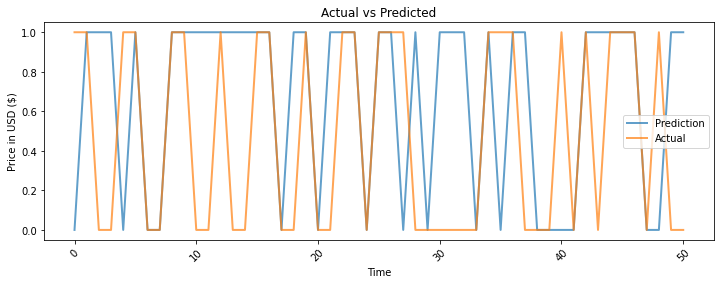

In [31]:
plt.figure(figsize = (12,4))
plt.plot(y_pred, label = "Prediction", lw = 2, alpha = 0.7)
plt.plot(y_test, label = "Actual", lw = 2, alpha = 0.7)

plt.title("Actual vs Predicted")
plt.xlabel("Time")
plt.ylabel("Price in USD ($)")
plt.legend()
plt.xticks(rotation = 45)
plt.show();

The model is not at all promising. A Lot of testing is needed and a large dataset is required. I am not performing Hyperparameter optimization because it wont make a significant impact as the dataset is very small. For getting better accuracy, other models of ML and DL might work better and we need a huge dataset as the price of Bitcoin is very volatile.